In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

#import image_data_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2025-02-28 18:37:21.329406: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 18:37:21.347547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740748041.363939  980561 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740748041.368461  980561 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 18:37:21.386088: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# data generator
train_dataset = keras.utils.image_dataset_from_directory(
    directory = './train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = './test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

Found 20000 files belonging to 2 classes.


I0000 00:00:1740748125.966613  980561 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 5000 files belonging to 2 classes.


In [3]:
#normalize the images to [0,1]
def normalize_images(image, label):
    return image/255, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

In [4]:
# create the CNN architecture
# first we will try with tanh as activation then we will try with relu

model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/home/harry/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# fit the model
history = model.fit(train_dataset, epochs=15, verbose=1, validation_data=test_dataset)

Epoch 1/15


I0000 00:00:1740748145.669722  980905 service.cc:148] XLA service 0x7f7d7c00c1d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740748145.669789  980905 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-02-28 18:39:05.713119: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740748146.049788  980905 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/313 ━━━━━━━━━━━━━━━━━━━━ 30s 99ms/step - accuracy: 0.4883 - loss: 0.8208   

I0000 00:00:1740748160.030281  980905 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5818 - loss: 0.6744

313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 126ms/step - accuracy: 0.5820 - loss: 0.6743 - val_accuracy: 0.7014 - val_loss: 0.5750
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.6942 - loss: 0.5746 - val_accuracy: 0.7390 - val_loss: 0.5310
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7463 - loss: 0.5194 - val_accuracy: 0.7590 - val_loss: 0.4970
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.7835 - loss: 0.4654 - val_accuracy: 0.7658 - val_loss: 0.4822
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.8056 - loss: 0.4239 - val_accuracy: 0.7748 - val_loss: 0.4714
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.8345 - loss: 0.3790 - val_accuracy: 0.7766 - val_loss: 0.4779
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.8585 - loss: 0.3411 - val_accuracy: 0.7758 - val_loss: 0.4841
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8834 - loss: 0.2912 - val_

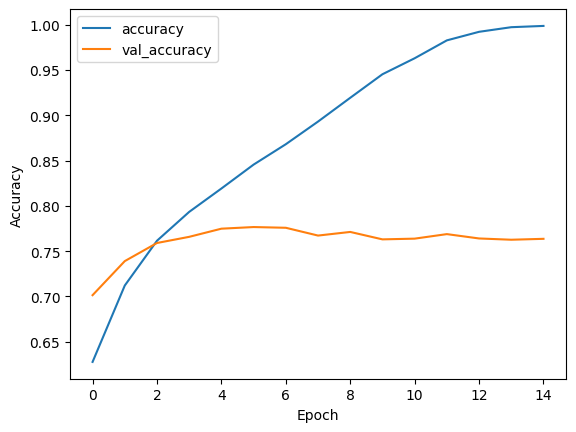

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# we see from the above plot that overfitting is happening. So we will try with early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 107ms/step - accuracy: 0.6056 - loss: 0.6697 - val_accuracy: 0.7134 - val_loss: 0.5656
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.7027 - loss: 0.5629 - val_accuracy: 0.7272 - val_loss: 0.5363
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.7489 - loss: 0.5055 - val_accuracy: 0.7578 - val_loss: 0.4995
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7878 - loss: 0.4554 - val_accuracy: 0.7676 - val_loss: 0.4766
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.8139 - loss: 0.4114 - val_accuracy: 0.7768 - val_loss: 0.4770
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.8371 - loss: 0.3737 - val_accuracy: 0.7626 - val_loss: 0.5120
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.8582 - loss: 0.3368 - val_accuracy: 0.7584 - val_loss: 0.5233


### Now we try with relu activation

In [11]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - accuracy: 0.5815 - loss: 0.6654 - val_accuracy: 0.6988 - val_loss: 0.5758
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.7088 - loss: 0.5588 - val_accuracy: 0.7504 - val_loss: 0.5145
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.7491 - loss: 0.5080 - val_accuracy: 0.7826 - val_loss: 0.4660
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.7792 - loss: 0.4630 - val_accuracy: 0.7788 - val_loss: 0.4703
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.8021 - loss: 0.4264 - val_accuracy: 0.8028 - val_loss: 0.4353
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.8245 - loss: 0.3947 - val_accuracy: 0.8148 - val_loss: 0.4134
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8377 - loss: 0.3686 - val_accuracy: 0.7992 - val_loss: 0.4401
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.8460 - loss: 0

### To address the problem of overfitting we perform data augmentation.
### We use Image_Data_Generator

In [14]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=40,          
    width_shift_range=0.2,      
    height_shift_range=0.2,     
    shear_range=0.2,            
    zoom_range=0.2,             
    horizontal_flip=True,       
    fill_mode='nearest'         
)

# For testing images, only normalize pixel values (no augmentation needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator that reads images from the training directory
train_generator = train_datagen.flow_from_directory(
    directory = './train',                  
    target_size=(150, 150),     
    batch_size=32,              
    class_mode='binary'         
)

# Create testing data generator that reads images from the testing directory
test_generator = test_datagen.flow_from_directory(
    directory ='./test',                   
    target_size=(150, 150),     
    batch_size=32,              
    class_mode='binary'         
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', padding = 'valid', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, epochs=30, verbose=1, validation_data = test_generator,callbacks=[early_stopping])

/home/harry/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 362s 572ms/step - accuracy: 0.5560 - loss: 0.6759 - val_accuracy: 0.6804 - val_loss: 0.5927
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 328s 525ms/step - accuracy: 0.6700 - loss: 0.6030 - val_accuracy: 0.7190 - val_loss: 0.5550
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 343s 549ms/step - accuracy: 0.6931 - loss: 0.5810 - val_accuracy: 0.7262 - val_loss: 0.5404
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 348s 556ms/step - accuracy: 0.7082 - loss: 0.5593 - val_accuracy: 0.7426 - val_loss: 0.5199
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 520ms/step - accuracy: 0.7257 - loss: 0.5404 - val_accuracy: 0.7736 - val_loss: 0.4835
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 373s 597ms/step - accuracy: 0.7418 - loss: 0.5216 - val_accuracy: 0.7748 - val_loss: 0.4712
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 335s 536ms/step - accuracy: 0.7462 - loss: 0.5081 - val_accuracy: 0.7854 - val_loss: 0.4521
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 376s 601ms/step - accuracy: 0.7566 -

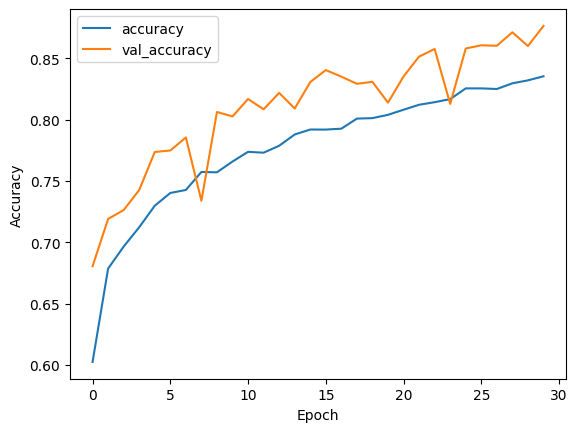

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

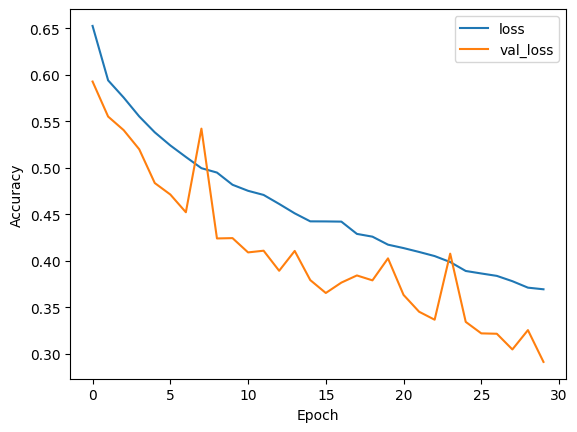

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()